In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [2]:
df = pd.read_csv(r'C:\Computer Science\Cognifyz\Dataset.csv')

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
# droping null values
df.dropna(inplace = True)

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.duplicated().sum()

0

C:\Users\KIIT\AppData\Local\Temp\ipykernel_34028\2783801720.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


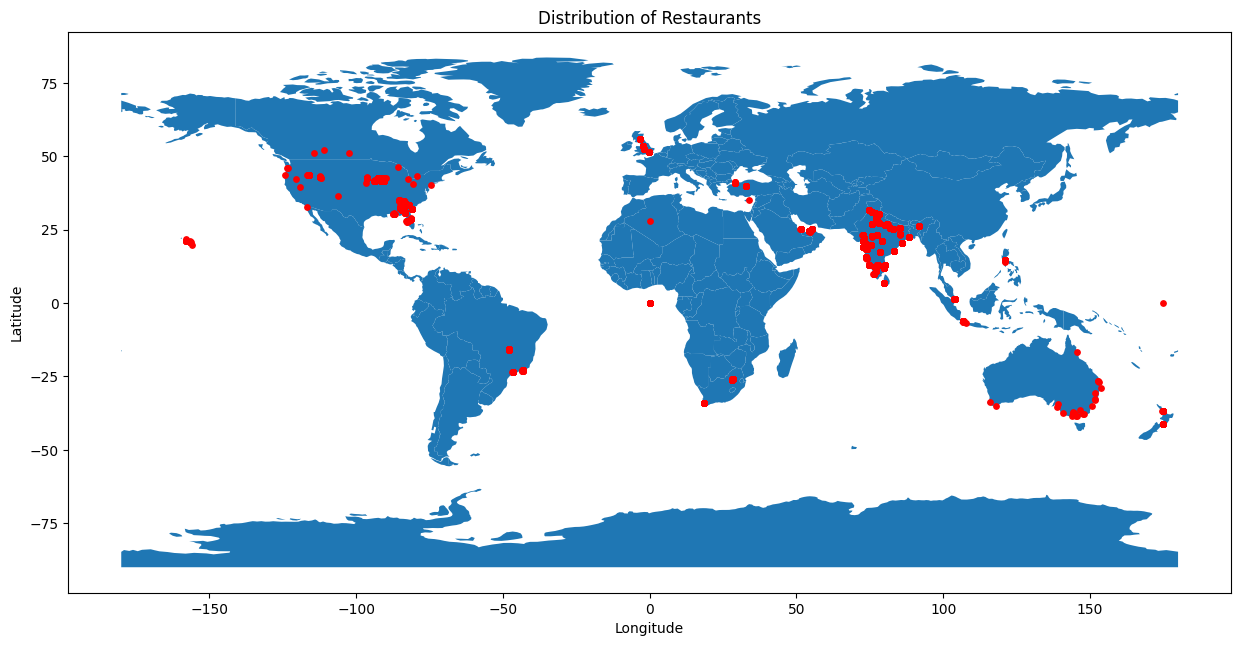

In [8]:
# Geographical Distribution of Restaurants
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 8)), marker='o', color='red', markersize=15);
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of Restaurants");

India has most number of restaurants in the world as we can clearly see from the map

USA also has decent amount of restaurants

Africa has least amount of restaurants

In [9]:
df['City'].value_counts()[0:15]

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Dubai             20
Kochi             20
Indore            20
Jaipur            20
Kanpur            20
Name: City, dtype: int64

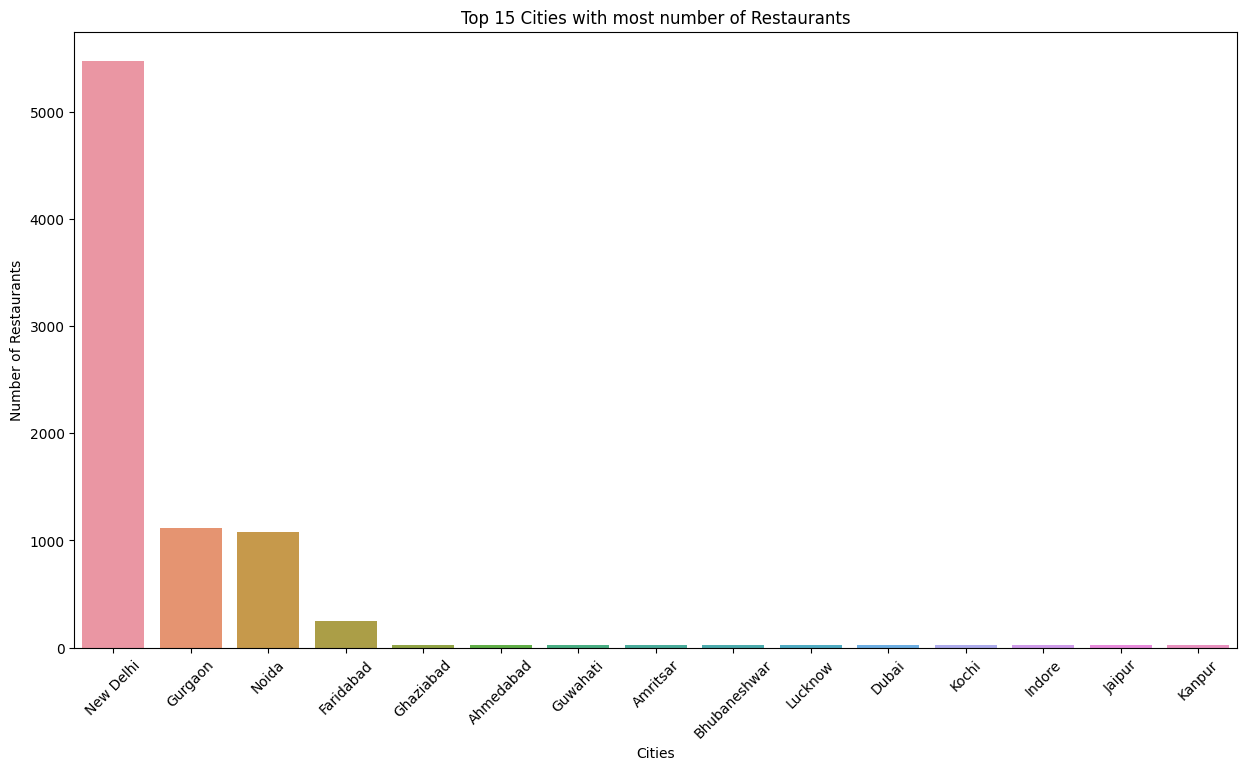

In [10]:
# Top 15 cities with most number of restaurantss
plt.figure(figsize = (15,8))
sns.barplot(x = df['City'].value_counts().index[0:15],y = df['City'].value_counts().values[0:15])
plt.xlabel("Cities")
plt.ylabel("Number of Restaurants")
plt.title("Top 15 Cities with most number of Restaurants")
plt.xticks(rotation = 45);

New Delhi has the most number of Restaurants followed by Gurgaon and Noida

In [11]:
# Top aggregate rating of cities
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean()

In [12]:
avg_rating_by_city = pd.DataFrame(avg_rating_by_city).reset_index()

In [13]:
avg_rating_by_city = avg_rating_by_city.sort_values("Aggregate rating",ascending = False)

In [14]:
avg_rating_by_city = avg_rating_by_city[0:10]
avg_rating_by_city

,City,Aggregate rating
56,Inner City,4.900000
106,Quezon City,4.800000
73,Makati City,4.650000
94,Pasig City,4.633333
75,Mandaluyong City,4.625000
15,Beechworth,4.600000
67,London,4.535000
122,Taguig City,4.525000
121,Tagaytay City,4.500000
115,Secunderabad,4.500000


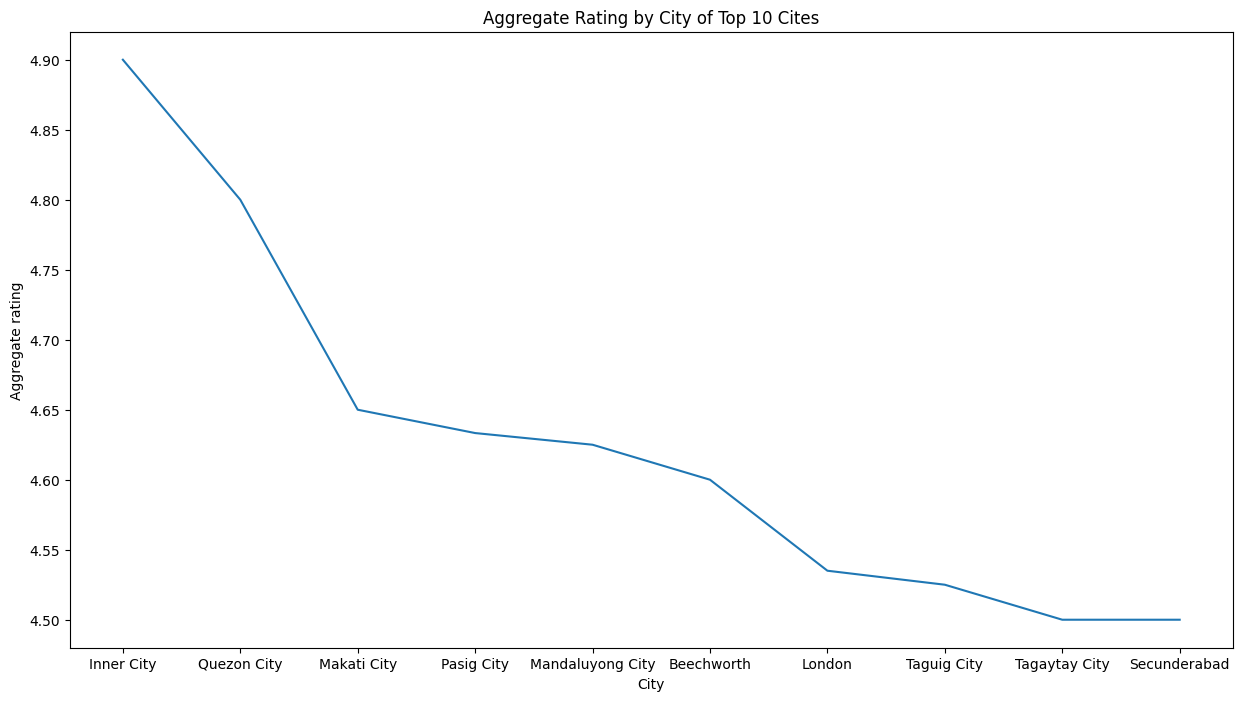

In [15]:
plt.figure(figsize = (15,8))
sns.lineplot(x = avg_rating_by_city['City'],y = avg_rating_by_city['Aggregate rating'],data = avg_rating_by_city)
plt.title("Aggregate Rating by City of Top 10 Cites");

Inner City's Restaurants have the highest aggregate rating of 4.9 followed by Quezon City(4.8) and Makati City(4.65)

In [16]:
# Top Avg cost for two by cities
avg_cost_two = df.groupby('City')['Average Cost for two'].mean()

In [17]:
avg_cost_two = pd.DataFrame(avg_cost_two).reset_index()

In [18]:
avg_cost_two = avg_cost_two.sort_values("Average Cost for two",ascending = False)

In [19]:
avg_cost_two = avg_cost_two[0:10]
avg_cost_two

,City,Average Cost for two
59,Jakarta,308437.500000
124,Tangerang,250000.000000
19,Bogor,160000.000000
13,Bandung,150000.000000
93,Pasay City,3333.333333
30,Colombo,2375.000000
75,Mandaluyong City,2000.000000
92,Panchkula,2000.000000
122,Taguig City,1725.000000
54,Hyderabad,1361.111111


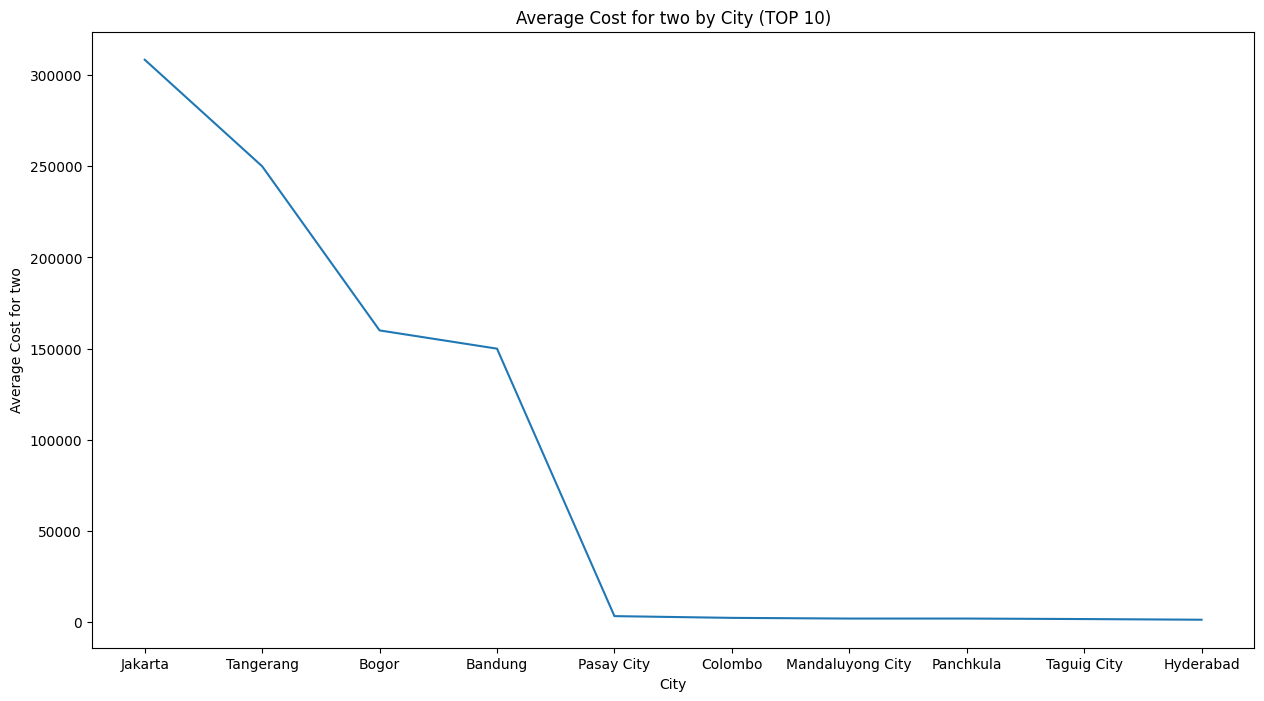

In [20]:
plt.figure(figsize = (15,8))
sns.lineplot(x = avg_cost_two['City'],y = avg_cost_two['Average Cost for two'],data = avg_cost_two)
plt.title("Average Cost for two by City (TOP 10)");

Average Cost for two is highest for jakarta which is 308437.50

In [21]:
# Most famous cuisines of top 10 cities
def famous_cuisines_by_cities(city):
    cuisines = df[df['City'] == city]['Cuisines']
    list_of_cuisines = ', '.join(cuisines).split(', ')
    return Counter(list_of_cuisines)

In [22]:
top_10_cities = df['City'].value_counts().index[0:10]

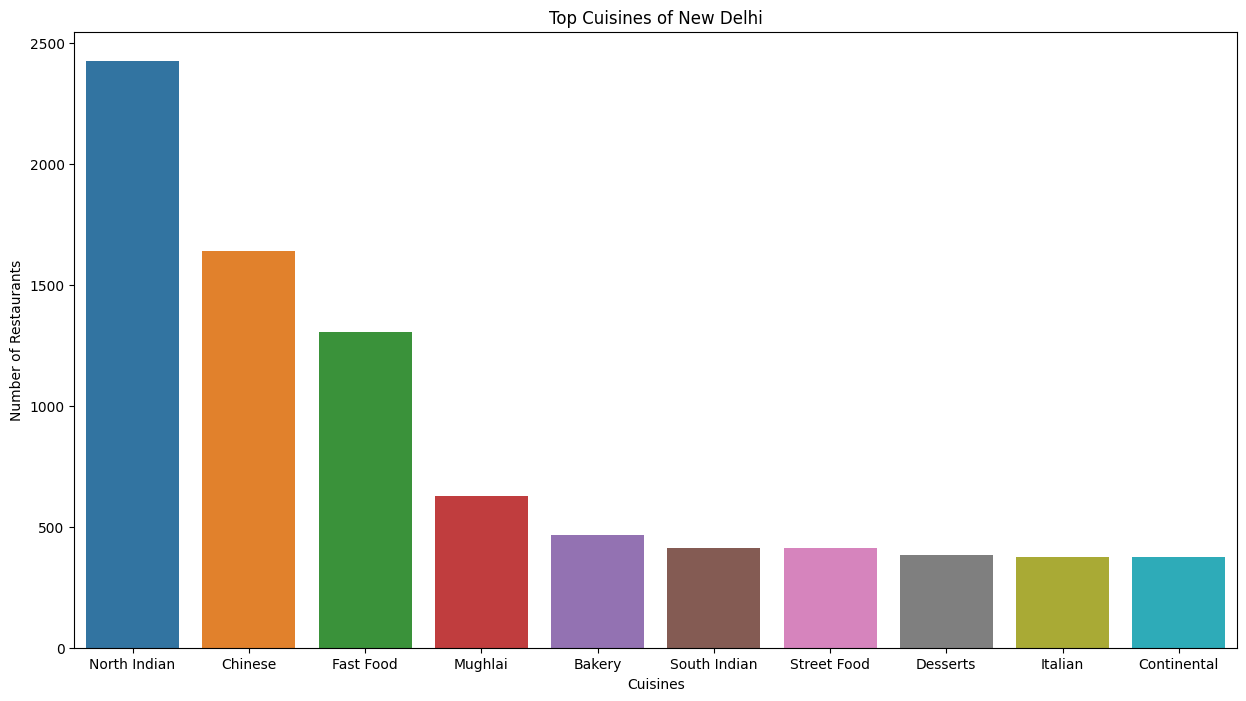

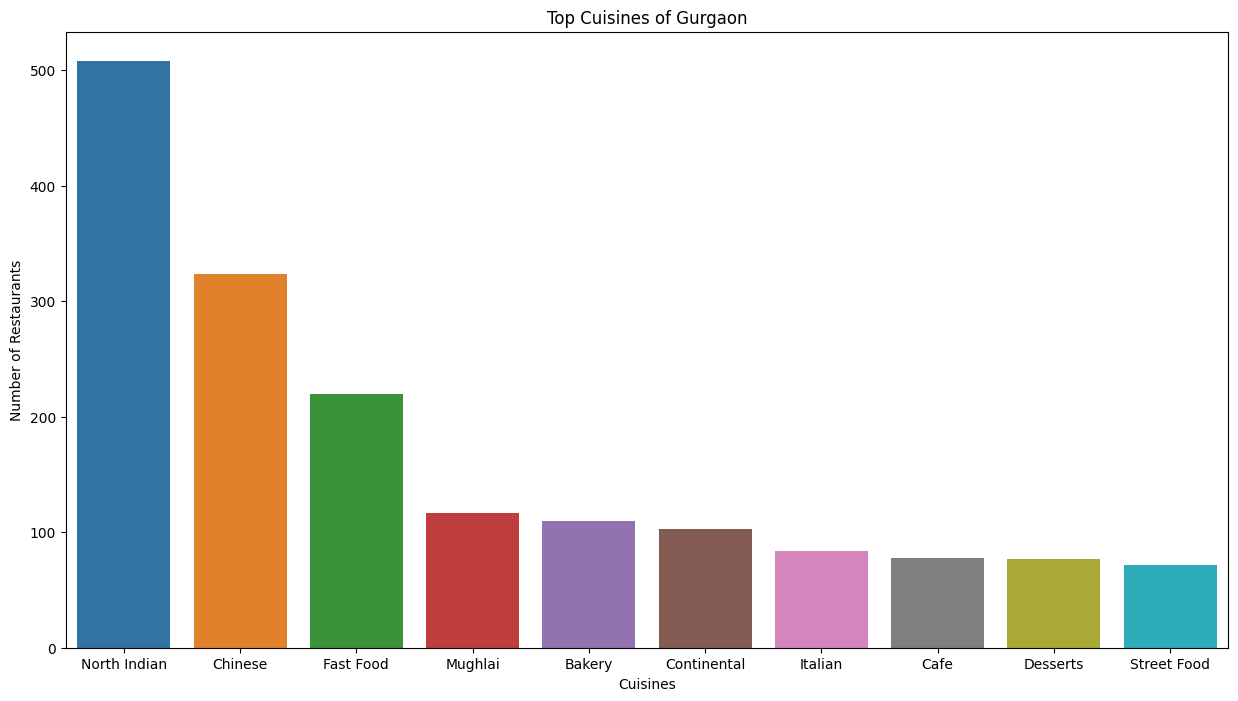

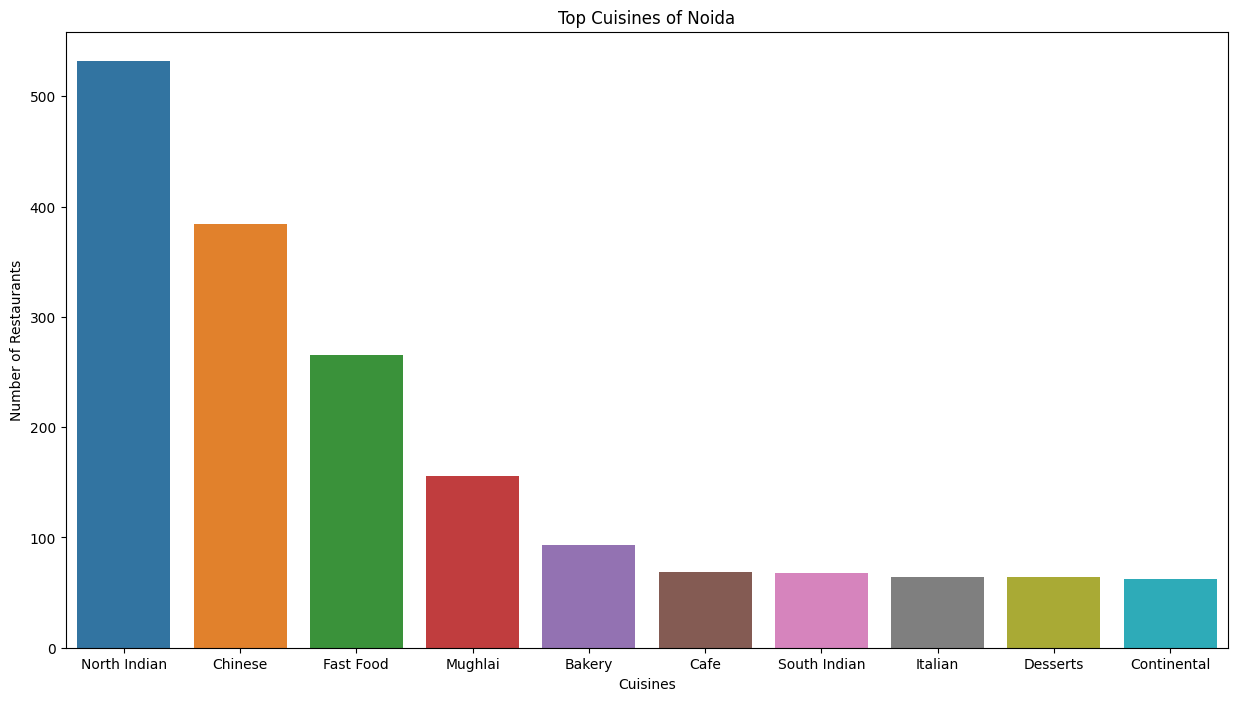

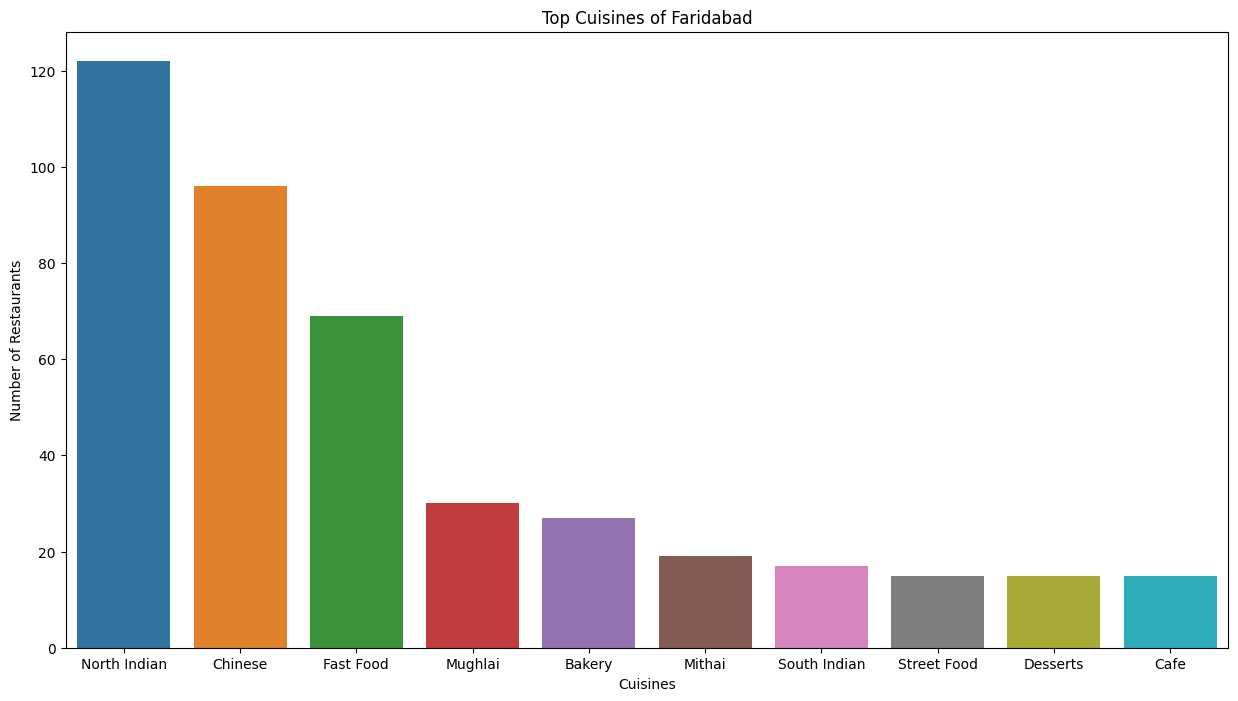

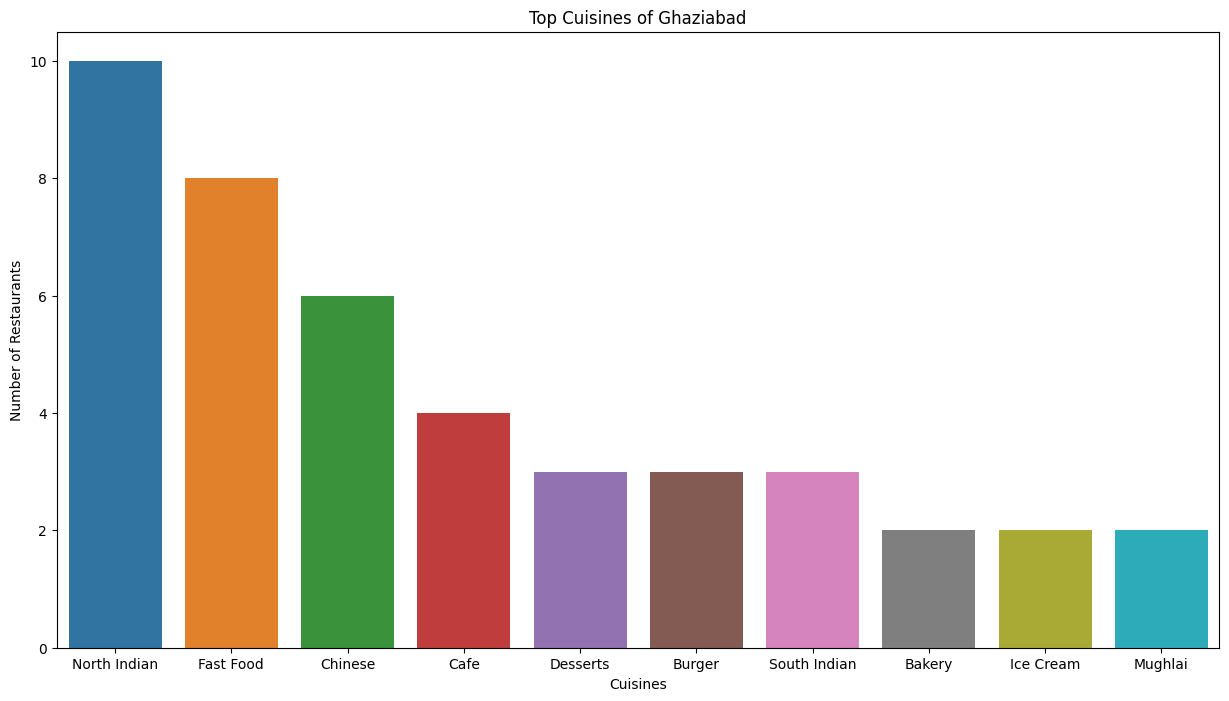

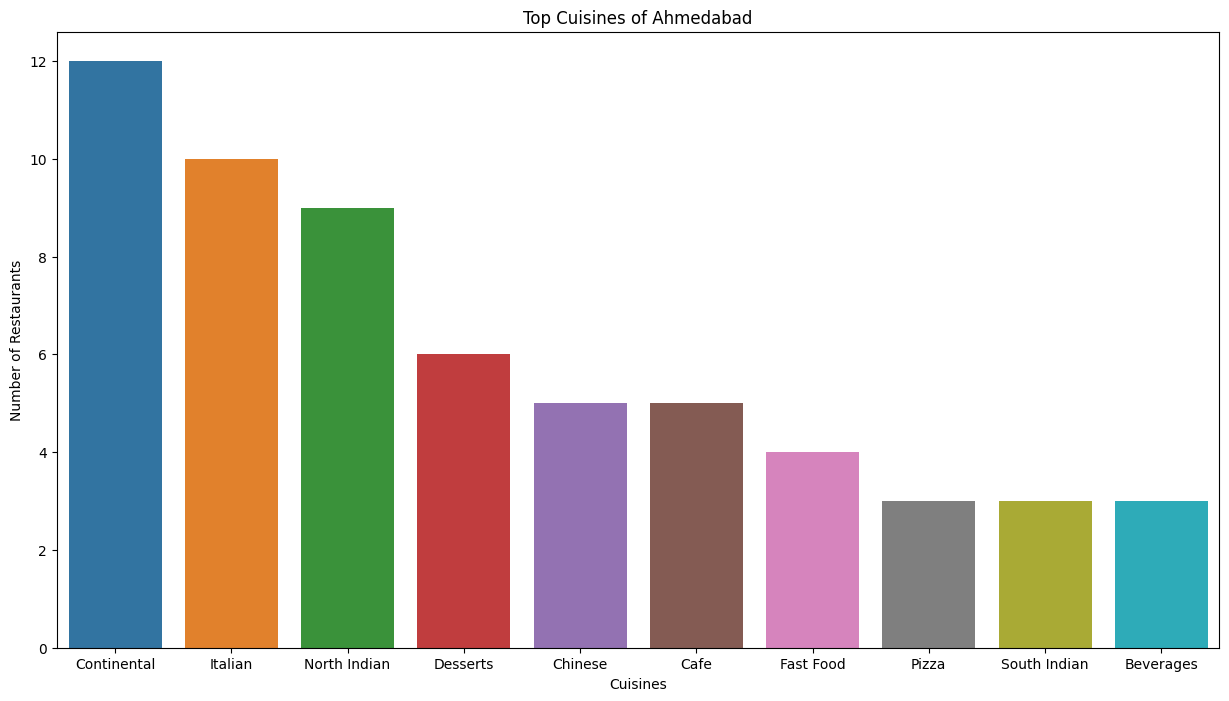

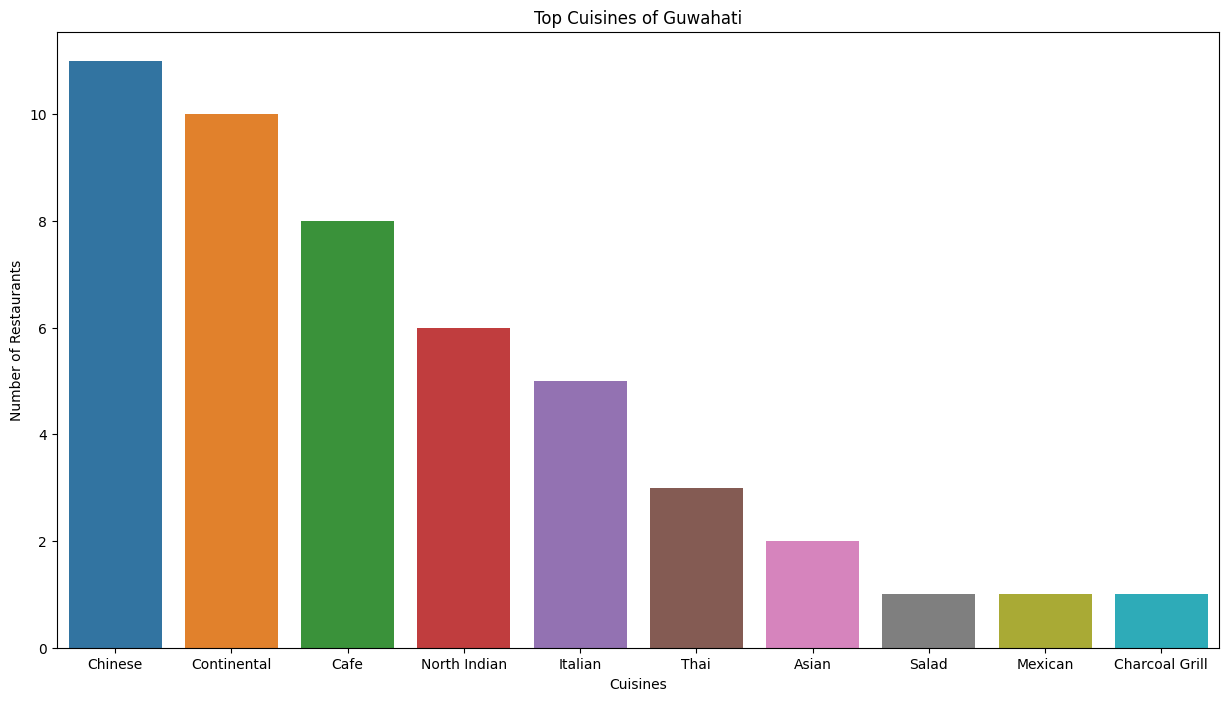

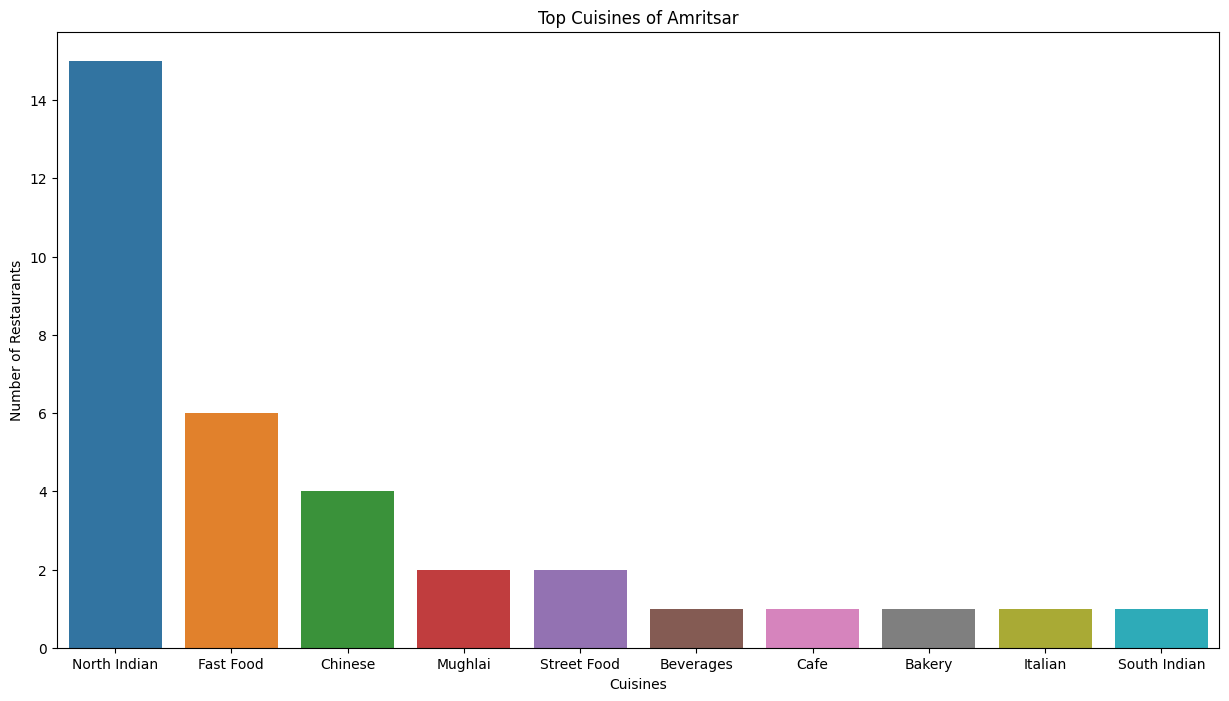

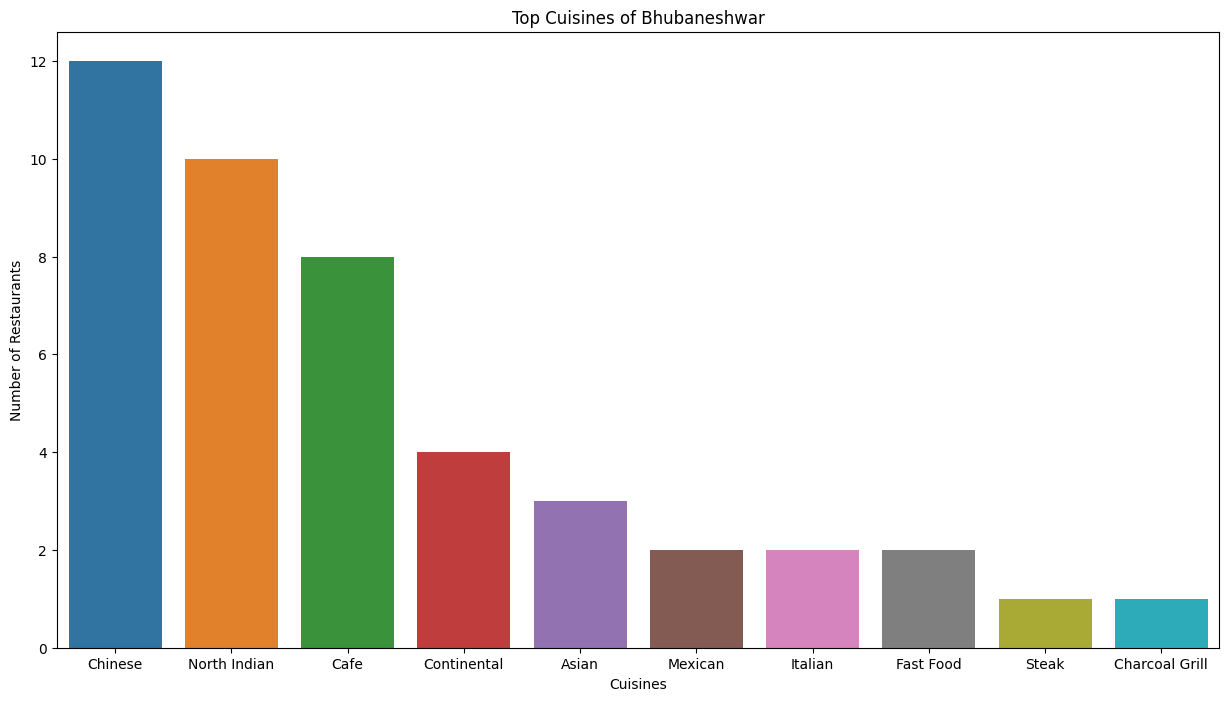

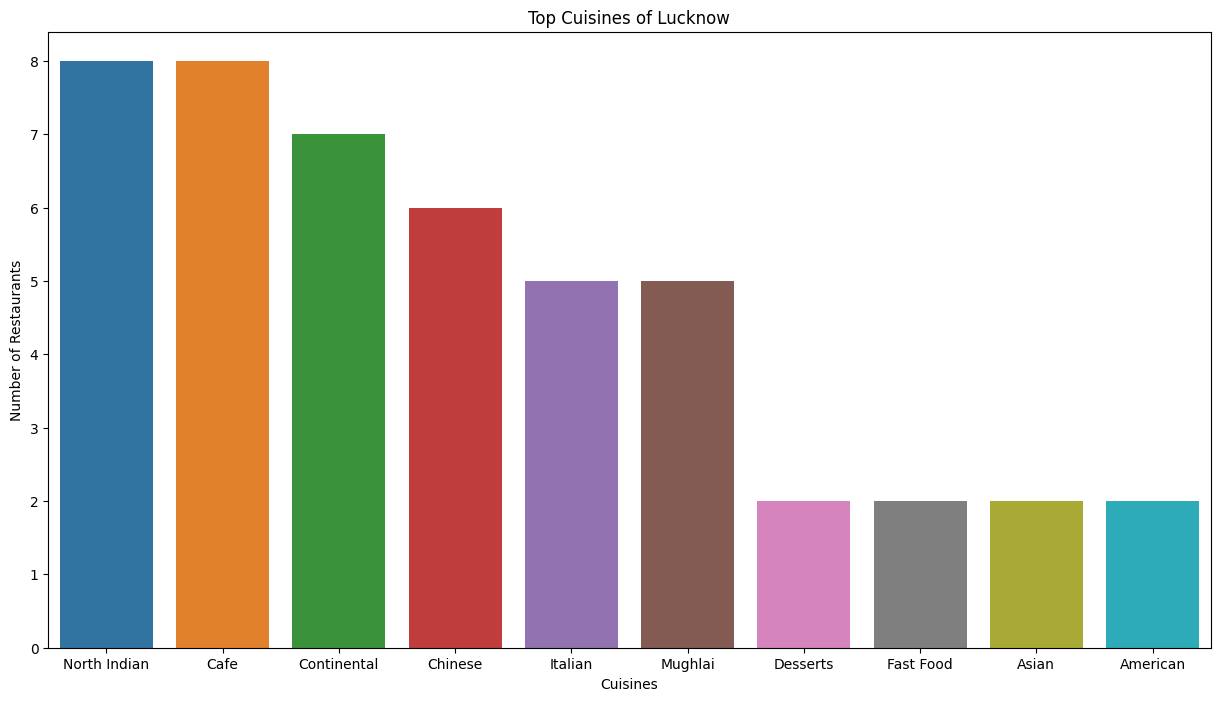

In [23]:
for city in top_10_cities:
    get_cuisines = famous_cuisines_by_cities(city)
    top_cuisines = pd.Series(get_cuisines).sort_values(ascending=False).head(10)
    plt.figure(figsize = (15,8))
    plt.title(f"Top Cuisines of {city}")
    plt.ylabel("Number of Restaurants")
    plt.xlabel("Cuisines")
    sns.barplot(x = top_cuisines.index,y = top_cuisines.values)

The above graph show the top 10 cities with most restaurants and cuisines which is famous or demanding in those city